# Explore here

PROYECTO K-MEANS

In [30]:
import pandas as pd
import numpy as np
import os
import requests

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import warnings

In [31]:
warnings.filterwarnings("ignore")

In [32]:
archivo = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

In [33]:
# 2Nombre y ruta de la carpeta para datos en crudo
raw_data_folder = "data/raw"
raw_data_path = os.path.join(raw_data_folder, "housing.csv")

# Crear la carpeta si no existe
if not os.path.exists(raw_data_folder):
    os.makedirs(raw_data_folder)

# Petición para descargar el fichero
response = requests.get(archivo)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Guardar el contenido en la carpeta en crudo
    with open(raw_data_path, 'wb') as file:
        file.write(response.content)
    print("Archivo guardado en crudo exitosamente en:", raw_data_path)
else:
    print("Error al descargar el archivo:", response.status_code)

# Leer el archivo CSV descargado 
df = pd.read_csv(raw_data_path)

Archivo guardado en crudo exitosamente en: data/raw/housing.csv


In [34]:

#Eliminamos las variables que no necesitamos
df_n= df.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], axis = 1)




In [35]:
# Dividimos el conjunto de datos en muestras de train y test

X = df_n

X_train, X_test= train_test_split(X,   test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)




(16512, 3)
(4128, 3)


In [36]:
#Entrenar modelo 
model = KMeans(n_clusters=6, random_state=42)

#Predecir clusters
y_train = model.fit_predict(X_train)

# Agregar los labels al DataFrame
X_train["cluster"] = y_train

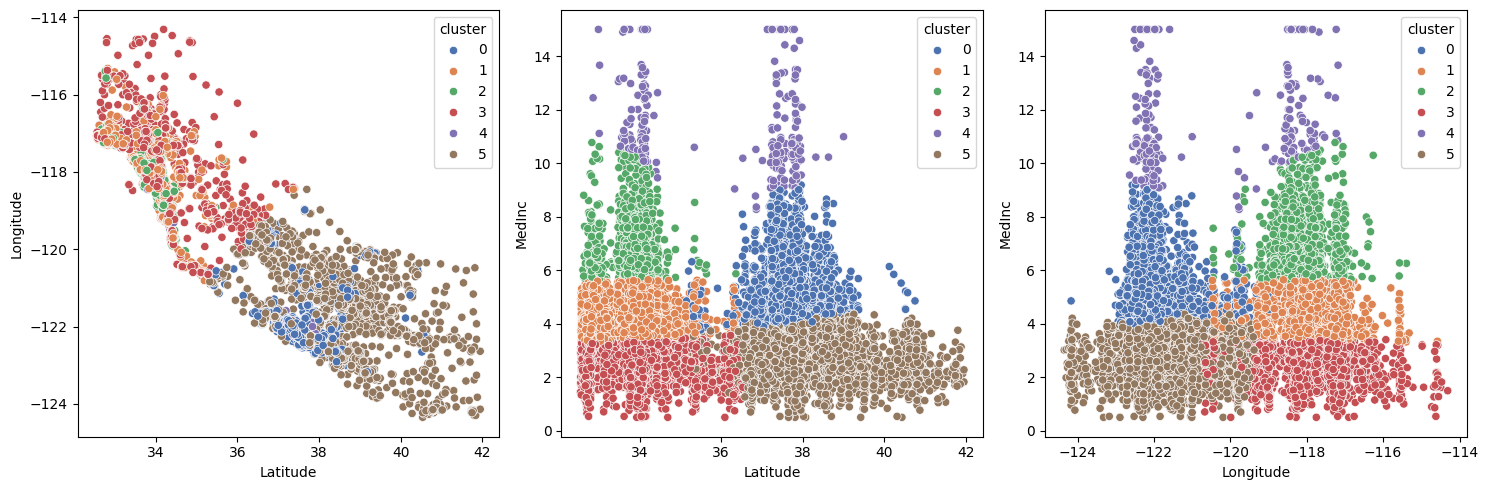

In [37]:
#Graficamos 
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [38]:
# Realizar predicciones con datos nuevos
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test

X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


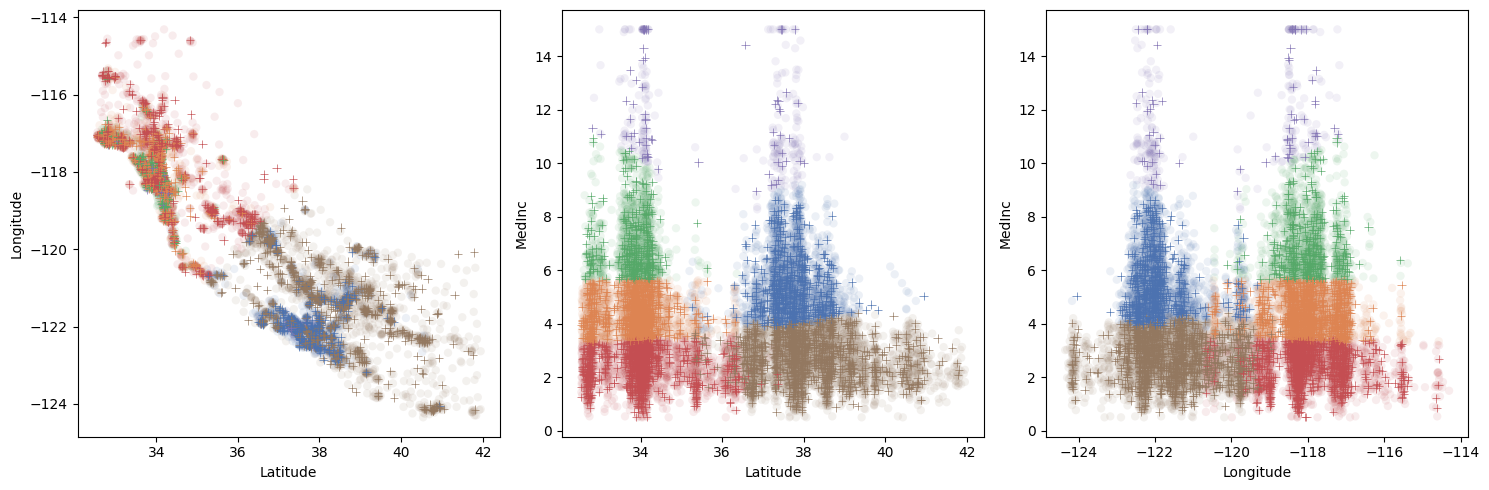

In [39]:
#Graficamos añadiendo a X_train los resultados del X_test
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep" , alpha =0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep",  alpha =0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker="+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker ="+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep",  marker ="+")
plt.tight_layout()

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [53]:
#Aplicamos un modelo

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


#En este caso Randomforest

model = RandomForestClassifier(random_state = 42)

# entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
#Predicciones train y test
y_pred_test = model.predict(X_test)
y_pred_test


array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [51]:
y_pred_train = model.predict(X_train)
y_pred_train

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [54]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  1.0
F1 score Test:  1.0
Precision Test:  1.0
Recall Test:  1.0
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


In [64]:

#Ahora pruebo con el Classifier y ajusto los hiperparametros
model = RandomForestClassifier(n_estimators= 50 ,max_depth = 2, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=42)

In [65]:
# predicción
y_pred_train = model.predict(X_train)
y_pred_train

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [66]:
y_pred_test = model.predict(X_test)
y_pred_test

array([3, 3, 5, ..., 0, 5, 1], shape=(4128,), dtype=int32)

In [67]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.9093992248062015
F1 score Test:  0.9093992248062015
Precision Test:  0.9093992248062015
Recall Test:  0.9093992248062015
Accuracy Train:  0.903343023255814
F1 score Train:  0.903343023255814
Precision Train:  0.903343023255814
Recall Train:  0.903343023255814


Me quedo con el classifier